In [1]:
# !pip install tweepy
# !pip install python-twitter
# !pip install textblob

In [26]:
import json
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import date
from datetime import datetime
import time
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn import model_selection, naive_bayes, svm
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

In [27]:
df1 = pd.read_csv('fake reviews dataset.csv')

In [28]:
df1

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [29]:
df1['label'].unique()

array(['CG', 'OR'], dtype=object)

In [30]:
# df1.to_csv('twepy.csv')

In [31]:
df1.shape

(40432, 4)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [33]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
category,0,0.0
rating,0,0.0
label,0,0.0
text_,0,0.0


In [34]:
df1 = df1.dropna()
df1.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [35]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
category,0,0.0
rating,0,0.0
label,0,0.0
text_,0,0.0


In [36]:
df1.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [37]:
df1.corr()

,rating
rating,1.0


In [38]:
df1['label'].unique()

array(['CG', 'OR'], dtype=object)

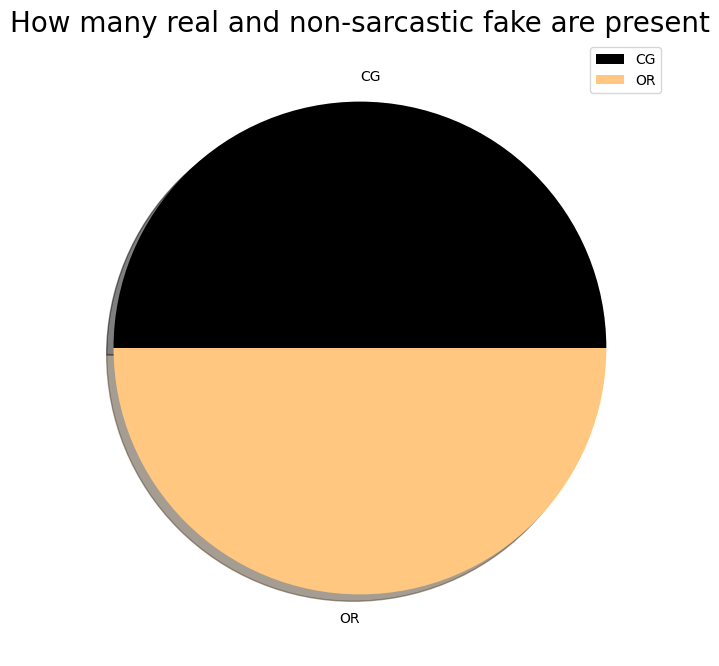

In [39]:
# plotting a pie chart to represent share of international repuatation

labels = ['CG', 'OR']
sizes = df1['label'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 2))
explode = [0, 0]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('How many real and non-sarcastic fake are present', fontsize = 20)
plt.legend()
plt.show()

In [40]:
for column_name in df1:
    num_nan_a = df1.loc[ (pd.isna(df1[column_name])) , column_name ].shape[0]

    print(f"There are {num_nan_a} NaNs in column "+column_name)

There are 0 NaNs in column category
There are 0 NaNs in column rating
There are 0 NaNs in column label
There are 0 NaNs in column text_


In [41]:
df1['text_']

0        Love this!  Well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  I...
2        This pillow saved my back. I love the look and...
3        Missing information on how to use it, but it i...
4        Very nice set. Good quality. We have had the s...
                               ...                        
40427    I had read some reviews saying that this bra r...
40428    I wasn't sure exactly what it would be. It is ...
40429    You can wear the hood by itself, wear it with ...
40430    I liked nothing about this dress. The only rea...
40431    I work in the wedding industry and have to wor...
Name: text_, Length: 40432, dtype: object

In [42]:
df1['label'].value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

In [43]:
df1

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [44]:
df = df1.drop(["category","rating"],axis=1)
df.head()

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...


In [45]:
import re
def text_cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
    text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
    text = re.sub(r'@[-)]+', '', text)            # removing @mentions
    text = re.sub(r'#:', '', text )                # removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)           # removing RT
    text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
    text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'
    return text

In [46]:
df['SentimentText'] = df['text_'].apply(text_cleaning)
df.head(10)

,label,text_,SentimentText
0,CG,"Love this! Well made, sturdy, and very comfor...","Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I...","love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i...","Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...,Very nice set. Good quality. We have had the s...
5,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,CG,They are the perfect touch for me and the only...,They are the perfect touch for me and the only...
7,CG,These done fit well and look great. I love th...,These done fit well and look great. I love th...
8,CG,"Great big numbers & easy to read, the only thi...","Great big numbers & easy to read, the only thi..."
9,CG,My son loves this comforter and it is very wel...,My son loves this comforter and it is very wel...


In [47]:
df['labels'] = df.label.map({'CG': 0, 'OR': 1})

In [48]:
df['labels'].value_counts()

0    20216
1    20216
Name: labels, dtype: int64

In [52]:
dfpos = df[df["labels"] == 0][:1329]
dfneg = df[df["labels"] == 1][:1329]



In [55]:
df = pd.concat([dfpos,dfneg],axis=0)
df

,label,text_,SentimentText,labels
0,CG,"Love this! Well made, sturdy, and very comfor...","Love this! Well made, sturdy, and very comfor...",0
1,CG,"love it, a great upgrade from the original. I...","love it, a great upgrade from the original. I...",0
2,CG,This pillow saved my back. I love the look and...,This pillow saved my back. I love the look and...,0
3,CG,"Missing information on how to use it, but it i...","Missing information on how to use it, but it i...",0
4,CG,Very nice set. Good quality. We have had the s...,Very nice set. Good quality. We have had the s...,0
...,...,...,...,...
2657,OR,"After using this for the past year or so, some...","After using this for the past year or so, some...",1
2658,OR,I absolutely LOVE this pillow cover and really...,I absolutely LOVE this pillow cover and really...,1
2659,OR,We have a big drafty house and keep the house ...,We have a big drafty house and keep the house ...,1
2660,OR,I used this to protect a 7 inch Santoku knife....,I used this to protect a 7 inch Santoku knife....,1


In [56]:
df.head()

,label,text_,SentimentText,labels
0,CG,"Love this! Well made, sturdy, and very comfor...","Love this! Well made, sturdy, and very comfor...",0
1,CG,"love it, a great upgrade from the original. I...","love it, a great upgrade from the original. I...",0
2,CG,This pillow saved my back. I love the look and...,This pillow saved my back. I love the look and...,0
3,CG,"Missing information on how to use it, but it i...","Missing information on how to use it, but it i...",0
4,CG,Very nice set. Good quality. We have had the s...,Very nice set. Good quality. We have had the s...,0


In [57]:
df.to_csv("neurak_process.csv")

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['SentimentText'].values, df['labels'].values, test_size=0.30)

In [59]:
# checking the data split
print('sentiment Text: ', x_train[0])
print('sentiment: ', y_train[0])

sentiment Text:  Works perfectly.  No danger of me cutting my hand with a knige trying to get out the inner seeded core.
sentiment:  1


In [60]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# instantiating the tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [61]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

The size of datatset vocab is:  3844


In [62]:
# converting tran and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [55, 145, 99, 1937, 10, 111, 782, 11, 337, 26, 4, 1938, 570, 7, 66, 67, 1, 1073, 1939, 1940]
Testing sequence:  [13, 582, 26, 11, 2, 19, 40, 321, 84, 1042, 10, 434, 8, 11, 93, 21, 434, 14, 17, 1, 88, 18, 23, 14, 1, 88, 434, 2, 19, 196, 423, 1, 35, 10, 21, 434, 6, 309]


In [63]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

The length of training sequence is:  61


In [64]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  61


In [65]:
# building the model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

model = Model(i,x)

In [66]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 61)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 61, 20)            76900     
_________________________________________________________________
lstm (LSTM)                  (None, 61, 15)            2160      
_________________________________________________________________
global_max_pooling1d (Global (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 79,671
Trainable params: 79,671
Non-trainable params: 0
__________________________________________________

In [67]:
print(pad_train,y_train)

[[   0    0    0 ... 1073 1939 1940]
 [   0    0    0 ...   49   46  168]
 [   0    0    0 ...   12   59    3]
 ...
 [   0    0    0 ...  298    3  430]
 [   0    0    0 ...  495  246  386]
 [   0    0    0 ...    5    7 1049]] [1 0 0 ... 1 1 1]


In [68]:
# compiling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# training the model
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=5)

Epoch 1/5
59/59 [==============================] - 1s 18ms/step - loss: 0.9782 - accuracy: 0.4903 - val_loss: 0.7455 - val_accuracy: 0.5226
Epoch 2/5
59/59 [==============================] - 1s 12ms/step - loss: 0.7086 - accuracy: 0.4978 - val_loss: 0.6974 - val_accuracy: 0.4774
Epoch 3/5
59/59 [==============================] - 1s 12ms/step - loss: 0.6947 - accuracy: 0.5167 - val_loss: 0.6851 - val_accuracy: 0.7043
Epoch 4/5
59/59 [==============================] - 1s 12ms/step - loss: 0.6616 - accuracy: 0.6640 - val_loss: 0.6322 - val_accuracy: 0.6880
Epoch 5/5
59/59 [==============================] - 1s 12ms/step - loss: 0.4708 - accuracy: 0.8489 - val_loss: 0.3941 - val_accuracy: 0.8434


In [69]:
from sklearn.metrics import confusion_matrix

# pred = model.predict(pad_test)

y_pred = np.argmax(model.predict(pad_test), axis=1)
# y_true = np.argmax(np.concatenate(list(map(itemgetter(1), list(test_data)))), axis=1)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [70]:
class_names = [0,1]

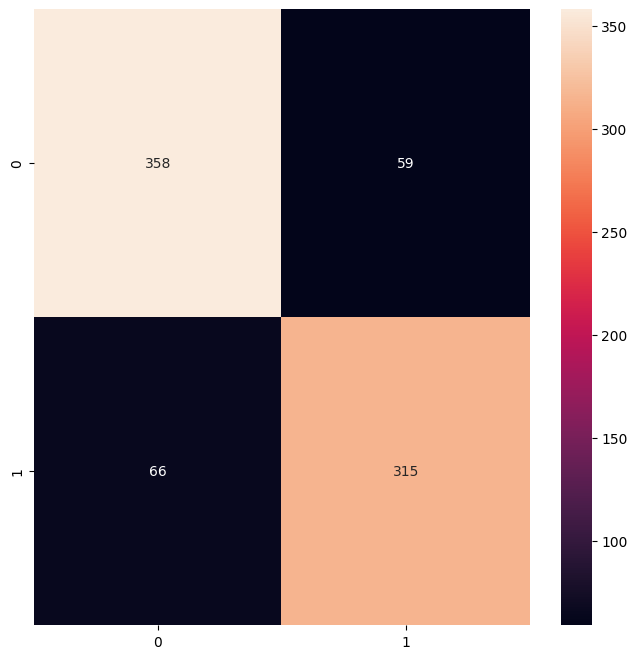

In [71]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_names, columns=class_names)

plt.figure()
sns.heatmap(confusion, annot=True, fmt='d')
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1]) 
print(cm)

[[358  59]
 [ 66 315]]


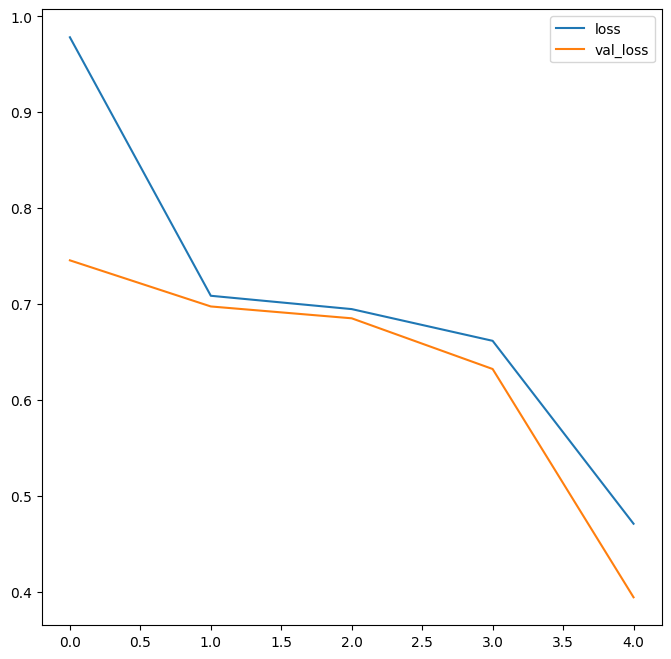

In [73]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

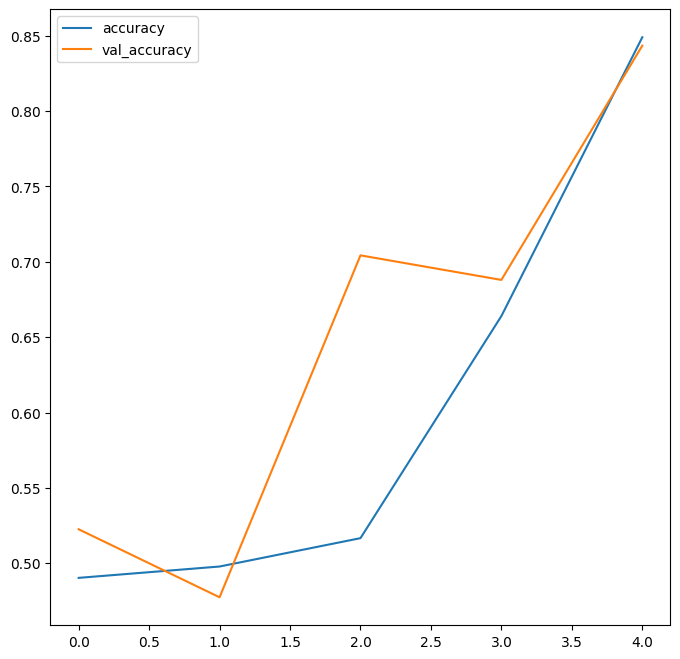

In [74]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [75]:
def predict_sentiment(text):
    # preprocessing the given text 
    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq, maxlen=T)
    
    # predicting the class
    predicted_sentiment = model.predict(text_pad).round()
    print(predicted_sentiment)
    op = []
    for i in predicted_sentiment:
        a = int(i[0])
        op.append(a)
        b = int(i[1])
        op.append(b)
        c = i[2]
        op.append(c)
    print(op)
    final_op = op.index(1)
    print(final_op)
    key = ['CG', 'OR']
    val = [0, 1]
    keys = val.index(final_op)
    print("printing key[final_op]")
    print(key[final_op])
            
text = ["What can you say--- cheap and it works as intended."]
predict_sentiment(text)

[[0. 1. 0.]]
[0, 1, 0.0]
1
printing key[final_op]
OR


In [76]:
# saving the model for future purpose
model.save('neural_sentiment.hp5')   # creates HDF5 file for model

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: neural_sentiment.hp5\assets
